# Data Wrangling & Exploratory Data Analysis (EDA)

## Contents:
 
 * Introduction
 * Dataset
 * Sourcing and Loading
   * Import relevant libraries
   * Converting Tensforflow Dataset to Pandas DataFrame
 * Data Wrangling 
 * Exploratory Data Analysis (EDA)
   * What is the most preferrable day to rate/watch movies?
   * Who, among men and women, watches/rates more movies?
   * What age group watches more movies?
   * What kind of occupation do users have that watch/rate movies the most?
   * Let's have more insights between male and female users
   * What are the most rated movies?
   * What are the most liked Movies?
   * Which year the users were interested the most to rate/watch movies?
   * What are the worst movies per rating?? ***Using worldcloud Package***
   * Is there any relation between the users rate and their geographical location? 
   * Whats the most popular Genre in our dataset?

## 1. Introduction: 

On the one hand, the **The Data wrangling step** focuses on collecting or converting the data, organizing it, and making sure it's well defined. For our project we will be using the ***movie_lens/100k dataset*** from TensorFlow  because it's a unique dataset with plenty of Metadata that's needed for this project. We'll focus in particular on:


 * Cleaning NANs (If any), duplicate values (If any), wrong values and removing insignificant columns.
 * Removing any special characters.
 * Renaming some Column labels.
 * Correcting some datatypes.
 
On the other hand, the **Exploratory Data Analysis EDA Step** will focus on: 
 
 * Getting familiar with the features in our dataset.
 * Understanding the core characteristics of our cleaned dataset.
 * Exploring the data relationships of all the features and understanding how the features compare to the response variable.
 * Further analyzing interesting plots to deepen our understanding of the data.

## 2. Dataset: 

**Movie Lens** contains a set of movie ratings from the MovieLens website, a movie recommendation service. This dataset was collected and maintained by [GroupLens](https://grouplens.org/) , a research group at the University of Minnesota. There are 5 versions that include: "25m", "latest-small", "100k", "1m", "20m". In all of the datasets, the movies and ratings data are joined on "movieId". The 25m dataset, latest-small dataset, and 20m dataset contain only the movie and rating data. The 1m dataset and 100k dataset contain demographic data in addition to the movie and rating data.


**[movie_lens/100k-ratings](https://www.tensorflow.org/datasets/catalog/movie_lens#movie_lens100k-ratings):**
 * Config description: This dataset contains 100,000 anonymous ratings of approximately 1,682 movies made by 943 MovieLens users who joined MovieLens. Ratings are in whole-star increments. This dataset contains demographic data of users in addition to data on movies and ratings.
 
 * This dataset is the second largest dataset that includes demographic data from movie_lens.
 * "user_gender": gender of the user who made the rating; a true value corresponds to male.
 * "bucketized_user_age": bucketized age values of the user who made the rating, the values and the corresponding ranges are:
   * 1: "Under 18"
   * 18: "18-24"
   * 25: "25-34"
   * 35: "35-44"
   * 45: "45-49"
   * 50: "50-55"
   * 56: "56+"
 * "movie_genres": The Genres of the movies are classified into 21 different classes as below:
   * 0: Action
   * 1: Adventure
   * 2: Animation
   * 3: Children
   * 4: Comedy
   * 5: Crime
   * 6: Documentary
   * 7: Drama
   * 8: Fantasy
   * 9: Film-Noir
   * 10: Horror
   * 11: IMAX
   * 12: Musical
   * 13: Mystery
   * 14: Romance
   * 15: Sci-Fi
   * 16: Thriller
   * 17: Unknown
   * 18: War
   * 19: Western
   * 20: no genres listed
   
 * "user_occupation_label": the occupation of the user who made the rating represented by an integer-encoded label; labels are preprocessed to be consistent across different versions
 * "user_occupation_text": the occupation of the user who made the rating in the original string; different versions can have different set of raw text labels
 * "user_zip_code": the zip code of the user who made the rating.
 * Download size: 4.70 MiB
 * Dataset size: 32.41 MiB
 * Auto-cached ([documentation](https://www.tensorflow.org/datasets/performances#auto-caching)): No
 * Features:
 ```
 FeaturesDict({
               'bucketized_user_age': tf.float32,
               'movie_genres': Sequence(ClassLabel(shape=(), dtype=tf.int64, num_classes=21)),
               'movie_id': tf.string,
               'movie_title': tf.string,
               'raw_user_age': tf.float32,
               'timestamp': tf.int64,
               'user_gender': tf.bool,
               'user_id': tf.string,
               'user_occupation_label': ClassLabel(shape=(), dtype=tf.int64, num_classes=22),
               'user_occupation_text': tf.string,
               'user_rating': tf.float32,
               'user_zip_code': tf.string,
              })
 ```
**Example:**

|bucketized_user_age	|movie_genres|	movie_id|	movie_title|	raw_user_age|	timestamp|	user_gender|	user_id	|user_occupation_label|	user_occupation_text	|user_rating	|user_zip_code|
|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
|45.0	|7 (Drama)|b'357'	|b"One Flew Over the Cuckoo's Nest (1975)"	|46.0	|879024327	|True	|b'138'	|4 (doctor/health care)	|b'doctor'	|4.0|	b'53211'|


## 3. Sourcing and Loading

###  Import relevant libraries

In [242]:
# Import the necessary Libararies: 

import os
import pprint
import tempfile
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Text
from wordcloud import WordCloud
import requests
import folium
from folium.plugins import MarkerCluster

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from typing import Dict, Text
import pandas as pd
import numpy as np

import tensorflow as tf

import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import seaborn as sns
import matplotlib.pyplot as plt

import re

plt.style.use('ggplot')

### Converting Tensforflow Dataset to Pandas DataFrame:

Let's have a first look at the data.

We use the MovieLens dataset from Tensorflow Datasets. Loading **[movie_lens/100k-ratings](https://www.tensorflow.org/datasets/catalog/movie_lens#movie_lens100k-ratings)** yields a ***tf.data.Dataset*** object containing the ratings data and loading **[movie_lens/100k-movies](https://www.tensorflow.org/datasets/catalog/movie_lens#movie_lens100k-movies)** yields a ***tf.data.Dataset*** object containing only the movies data.

Note that since the MovieLens dataset does not have predefined splits, all data are under train split.

In [4]:
# Ratings data.
ratings = tfds.load("movielens/100k-ratings", split="train", shuffle_files=True)
# Features of all the available movies.
movies = tfds.load("movielens/100k-movies", split="train", shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling movielens-train.tfrecord...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Dataset movielens downloaded and prepared to C:\Users\mohamed.ziane\tensorflow_datasets\movielens\100k-ratings\0.1.0. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling movielens-train.tfrecord...:   0%|          | 0/1682 [00:00<?, ? examples/s]

Dataset movielens downloaded and prepared to C:\Users\mohamed.ziane\tensorflow_datasets\movielens\100k-movies\0.1.0. Subsequent calls will reuse this data.


In [5]:
#The ratings dataset returns a dictionary of movie id, user id, the assigned rating, timestamp, movie information, and user information:
#View the data from ratings dataset:
for x in ratings.take(1).as_numpy_iterator():
    pprint.pprint(x)

{'bucketized_user_age': 45.0,
 'movie_genres': array([7], dtype=int64),
 'movie_id': b'357',
 'movie_title': b"One Flew Over the Cuckoo's Nest (1975)",
 'raw_user_age': 46.0,
 'timestamp': 879024327,
 'user_gender': True,
 'user_id': b'138',
 'user_occupation_label': 4,
 'user_occupation_text': b'doctor',
 'user_rating': 4.0,
 'user_zip_code': b'53211'}


In [6]:
#The movies dataset contains the movie id, movie title, and data on what genres it belongs to. Note that the genres are encoded with integer labels:
#View the data from movies dataset:
for x in movies.take(1).as_numpy_iterator():
    pprint.pprint(x)

{'movie_genres': array([4], dtype=int64),
 'movie_id': b'1681',
 'movie_title': b'You So Crazy (1994)'}


In [8]:
# Now let's convert Tensforflow Ratings Dataset into a Pandas Data Frame:
df_ratings = tfds.as_dataframe(ratings)

In [9]:
# Now let's convert Tensforflow Movies Dataset into a Pandas Data Frame:
df_movies = tfds.as_dataframe(movies)

In [14]:
#Let's have a quick peek at the data
df_ratings.head()
df_ratings.info()
df_ratings.shape
df_ratings.describe()

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code
0,45.0,[7],b'357',"b""One Flew Over the Cuckoo's Nest (1975)""",46.0,879024327,True,b'138',4,b'doctor',4.0,b'53211'
1,25.0,"[4, 14]",b'709',b'Strictly Ballroom (1992)',32.0,875654590,True,b'92',5,b'entertainment',2.0,b'80525'
2,18.0,[4],b'412',"b'Very Brady Sequel, A (1996)'",24.0,882075110,True,b'301',17,b'student',4.0,b'55439'
3,50.0,"[5, 7]",b'56',b'Pulp Fiction (1994)',50.0,883326919,True,b'60',4,b'healthcare',4.0,b'06472'
4,50.0,"[10, 16]",b'895',b'Scream 2 (1997)',55.0,891409199,True,b'197',18,b'technician',3.0,b'75094'


<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   bucketized_user_age    100000 non-null  float32
 1   movie_genres           100000 non-null  object 
 2   movie_id               100000 non-null  object 
 3   movie_title            100000 non-null  object 
 4   raw_user_age           100000 non-null  float32
 5   timestamp              100000 non-null  int64  
 6   user_gender            100000 non-null  bool   
 7   user_id                100000 non-null  object 
 8   user_occupation_label  100000 non-null  int64  
 9   user_occupation_text   100000 non-null  object 
 10  user_rating            100000 non-null  float32
 11  user_zip_code          100000 non-null  object 
dtypes: bool(1), float32(3), int64(2), object(6)
memory usage: 7.3+ MB


(100000, 12)

,bucketized_user_age,raw_user_age,timestamp,user_occupation_label,user_rating
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,29.235460,32.969849,8.835289e+08,11.404320,3.529860
std,12.003675,11.562675,5.343856e+06,6.549283,1.125751
min,1.000000,7.000000,8.747247e+08,0.000000,1.000000
25%,18.000000,24.000000,8.794487e+08,6.000000,3.000000
50%,25.000000,30.000000,8.828269e+08,12.000000,4.000000
75%,35.000000,40.000000,8.882600e+08,17.000000,4.000000
max,56.000000,73.000000,8.932866e+08,21.000000,5.000000


In [15]:
os.chdir("C:\\Users\\mohamed.ziane\\tensorflow_datasets\\Notebooks")

In [19]:
df_ratings.to_csv('df_ratings.csv')
df_movies.to_csv('df_movies.csv')

In [196]:
df_ratings = pd.read_csv('df_ratings.csv')
df_movies = pd.read_csv('df_movies.csv')
del df_ratings['Unnamed: 0']
del df_movies['Unnamed: 0']

In [197]:
#The class of the dataframe is now in Pandas instead of 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'
df_ratings.head()
df_ratings.info()
df_ratings.shape
df_ratings.describe()

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code
0,45.0,[7],b'357',"b""One Flew Over the Cuckoo's Nest (1975)""",46.0,879024327,True,b'138',4,b'doctor',4.0,b'53211'
1,25.0,[ 4 14],b'709',b'Strictly Ballroom (1992)',32.0,875654590,True,b'92',5,b'entertainment',2.0,b'80525'
2,18.0,[4],b'412',"b'Very Brady Sequel, A (1996)'",24.0,882075110,True,b'301',17,b'student',4.0,b'55439'
3,50.0,[5 7],b'56',b'Pulp Fiction (1994)',50.0,883326919,True,b'60',4,b'healthcare',4.0,b'06472'
4,50.0,[10 16],b'895',b'Scream 2 (1997)',55.0,891409199,True,b'197',18,b'technician',3.0,b'75094'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   bucketized_user_age    100000 non-null  float64
 1   movie_genres           100000 non-null  object 
 2   movie_id               100000 non-null  object 
 3   movie_title            100000 non-null  object 
 4   raw_user_age           100000 non-null  float64
 5   timestamp              100000 non-null  int64  
 6   user_gender            100000 non-null  bool   
 7   user_id                100000 non-null  object 
 8   user_occupation_label  100000 non-null  int64  
 9   user_occupation_text   100000 non-null  object 
 10  user_rating            100000 non-null  float64
 11  user_zip_code          100000 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 8.5+ MB


(100000, 12)

,bucketized_user_age,raw_user_age,timestamp,user_occupation_label,user_rating
count,100000.0,100000.0,100000.0,100000.0,100000.0
mean,29.2,33.0,883528851.5,11.4,3.5
std,12.0,11.6,5343856.2,6.5,1.1
min,1.0,7.0,874724710.0,0.0,1.0
25%,18.0,24.0,879448709.5,6.0,3.0
50%,25.0,30.0,882826944.0,12.0,4.0
75%,35.0,40.0,888259984.0,17.0,4.0
max,56.0,73.0,893286638.0,21.0,5.0


## 4. Data Wrangling

**Data Wrangling Objectivs:**

 * Changing the user_gender from booleans "Female" or "Male" to the following association: True:"Male", False:"Female"
 * Removing the symbols: (b), (') and (").
 * Dropping the following columns: "user_occupation_label" and "movie_genres".
 * Changong "timestamp" which is in the unix epoch (units of seconds) to a datetime64 type.
 * Fixing any wrong values in "user_zip_code" (removing any zipcode >5 characters & zip codes made out of letters)

In [198]:
# let's change the user_gender to reflect the following association True for 'Male' and False to 'Female':
df_ratings.loc[df_ratings['user_gender'] == True, 'user_gender'] = 'male'
df_ratings.loc[df_ratings['user_gender'] == False, 'user_gender'] = 'female'

In [199]:
df_ratings.head()
df_ratings.info()

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code
0,45.0,[7],b'357',"b""One Flew Over the Cuckoo's Nest (1975)""",46.0,879024327,male,b'138',4,b'doctor',4.0,b'53211'
1,25.0,[ 4 14],b'709',b'Strictly Ballroom (1992)',32.0,875654590,male,b'92',5,b'entertainment',2.0,b'80525'
2,18.0,[4],b'412',"b'Very Brady Sequel, A (1996)'",24.0,882075110,male,b'301',17,b'student',4.0,b'55439'
3,50.0,[5 7],b'56',b'Pulp Fiction (1994)',50.0,883326919,male,b'60',4,b'healthcare',4.0,b'06472'
4,50.0,[10 16],b'895',b'Scream 2 (1997)',55.0,891409199,male,b'197',18,b'technician',3.0,b'75094'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   bucketized_user_age    100000 non-null  float64
 1   movie_genres           100000 non-null  object 
 2   movie_id               100000 non-null  object 
 3   movie_title            100000 non-null  object 
 4   raw_user_age           100000 non-null  float64
 5   timestamp              100000 non-null  int64  
 6   user_gender            100000 non-null  object 
 7   user_id                100000 non-null  object 
 8   user_occupation_label  100000 non-null  int64  
 9   user_occupation_text   100000 non-null  object 
 10  user_rating            100000 non-null  float64
 11  user_zip_code          100000 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 9.2+ MB


In [200]:
# Let's now work on editing the 'user_zip_code' column by removing the extra non-needed charcters: 'b' and single quotations
df_ratings['user_zip_code'] = df_ratings['user_zip_code'].str.strip("b")
df_ratings['user_zip_code'] = df_ratings['user_zip_code'].str.strip("'")

In [201]:
df_ratings.head()
df_ratings.info()

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code
0,45.0,[7],b'357',"b""One Flew Over the Cuckoo's Nest (1975)""",46.0,879024327,male,b'138',4,b'doctor',4.0,53211
1,25.0,[ 4 14],b'709',b'Strictly Ballroom (1992)',32.0,875654590,male,b'92',5,b'entertainment',2.0,80525
2,18.0,[4],b'412',"b'Very Brady Sequel, A (1996)'",24.0,882075110,male,b'301',17,b'student',4.0,55439
3,50.0,[5 7],b'56',b'Pulp Fiction (1994)',50.0,883326919,male,b'60',4,b'healthcare',4.0,06472
4,50.0,[10 16],b'895',b'Scream 2 (1997)',55.0,891409199,male,b'197',18,b'technician',3.0,75094


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   bucketized_user_age    100000 non-null  float64
 1   movie_genres           100000 non-null  object 
 2   movie_id               100000 non-null  object 
 3   movie_title            100000 non-null  object 
 4   raw_user_age           100000 non-null  float64
 5   timestamp              100000 non-null  int64  
 6   user_gender            100000 non-null  object 
 7   user_id                100000 non-null  object 
 8   user_occupation_label  100000 non-null  int64  
 9   user_occupation_text   100000 non-null  object 
 10  user_rating            100000 non-null  float64
 11  user_zip_code          100000 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 9.2+ MB


In [202]:
df_ratings.describe()

,bucketized_user_age,raw_user_age,timestamp,user_occupation_label,user_rating
count,100000.0,100000.0,100000.0,100000.0,100000.0
mean,29.2,33.0,883528851.5,11.4,3.5
std,12.0,11.6,5343856.2,6.5,1.1
min,1.0,7.0,874724710.0,0.0,1.0
25%,18.0,24.0,879448709.5,6.0,3.0
50%,25.0,30.0,882826944.0,12.0,4.0
75%,35.0,40.0,888259984.0,17.0,4.0
max,56.0,73.0,893286638.0,21.0,5.0


In [203]:
#let's now double check if there are user_zip_code entries that may have more than 5 characters:
df_ratings[df_ratings.user_zip_code.str.len() > 5]

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code


In [204]:
# Let's now check if there are any zip codes that are made of alphabetical letters rather than numbers
(df_ratings.loc[df_ratings.user_zip_code.str.contains(r'[a-zA-Z]')])
# There are 2086 rows that match these conditions, let's remove those data in the next steps.

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code
8,25.0,[4],b'425',b'Bob Roberts (1992)',27.0,880844102,male,b'916',18,b'engineer',5.0,N2L5N
40,35.0,[ 7 13],b'124',b'Lone Star (1996)',39.0,875728913,male,b'634',18,b'engineer',3.0,T8H1N
363,18.0,[ 7 14],b'1315',b'Inventing the Abbotts (1997)',22.0,880951743,female,b'599',17,b'student',4.0,R3T5K
386,45.0,[ 7 16],b'717',"b'Juror, The (1996)'",47.0,886395230,male,b'458',18,b'technician',1.0,Y1A6B
416,35.0,[5],b'547',"b""Young Poisoner's Handbook, The (1995)""",35.0,883432633,female,b'857',2,b'administrator',3.0,V1G4L
...,...,...,...,...,...,...,...,...,...,...,...,...
99811,35.0,[7],b'58',b'Quiz Show (1994)',37.0,879360933,female,b'719',11,b'other',3.0,V0R2H
99820,18.0,[ 0 1 14 15 18],b'50',b'Star Wars (1977)',21.0,879846489,male,b'709',11,b'other',5.0,N4T1A
99849,25.0,[7],b'1193',b'Before the Rain (Pred dozhdot) (1994)',27.0,884111873,male,b'201',21,b'writer',4.0,E2A4H
99868,25.0,[ 7 14],b'1119',b'Some Kind of Wonderful (1987)',27.0,880845505,male,b'916',18,b'engineer',3.0,N2L5N


In [205]:
# Dropping 2086 rows corresponding to zip codes with aplphabetical letters instead of numbers
df_ratings = df_ratings.drop(df_ratings.loc[df_ratings.user_zip_code.str.contains(r'[a-zA-Z]')].index)

In [206]:
df_ratings.head()
df_ratings.info()

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code
0,45.0,[7],b'357',"b""One Flew Over the Cuckoo's Nest (1975)""",46.0,879024327,male,b'138',4,b'doctor',4.0,53211
1,25.0,[ 4 14],b'709',b'Strictly Ballroom (1992)',32.0,875654590,male,b'92',5,b'entertainment',2.0,80525
2,18.0,[4],b'412',"b'Very Brady Sequel, A (1996)'",24.0,882075110,male,b'301',17,b'student',4.0,55439
3,50.0,[5 7],b'56',b'Pulp Fiction (1994)',50.0,883326919,male,b'60',4,b'healthcare',4.0,06472
4,50.0,[10 16],b'895',b'Scream 2 (1997)',55.0,891409199,male,b'197',18,b'technician',3.0,75094


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97914 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bucketized_user_age    97914 non-null  float64
 1   movie_genres           97914 non-null  object 
 2   movie_id               97914 non-null  object 
 3   movie_title            97914 non-null  object 
 4   raw_user_age           97914 non-null  float64
 5   timestamp              97914 non-null  int64  
 6   user_gender            97914 non-null  object 
 7   user_id                97914 non-null  object 
 8   user_occupation_label  97914 non-null  int64  
 9   user_occupation_text   97914 non-null  object 
 10  user_rating            97914 non-null  float64
 11  user_zip_code          97914 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 9.7+ MB


In [207]:
# Let's change now user_zip_code data type from str to int:
df_ratings['user_zip_code'] = df_ratings['user_zip_code'].astype('int64')

In [208]:
df_ratings.head()
df_ratings.info()

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code
0,45.0,[7],b'357',"b""One Flew Over the Cuckoo's Nest (1975)""",46.0,879024327,male,b'138',4,b'doctor',4.0,53211
1,25.0,[ 4 14],b'709',b'Strictly Ballroom (1992)',32.0,875654590,male,b'92',5,b'entertainment',2.0,80525
2,18.0,[4],b'412',"b'Very Brady Sequel, A (1996)'",24.0,882075110,male,b'301',17,b'student',4.0,55439
3,50.0,[5 7],b'56',b'Pulp Fiction (1994)',50.0,883326919,male,b'60',4,b'healthcare',4.0,6472
4,50.0,[10 16],b'895',b'Scream 2 (1997)',55.0,891409199,male,b'197',18,b'technician',3.0,75094


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97914 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bucketized_user_age    97914 non-null  float64
 1   movie_genres           97914 non-null  object 
 2   movie_id               97914 non-null  object 
 3   movie_title            97914 non-null  object 
 4   raw_user_age           97914 non-null  float64
 5   timestamp              97914 non-null  int64  
 6   user_gender            97914 non-null  object 
 7   user_id                97914 non-null  object 
 8   user_occupation_label  97914 non-null  int64  
 9   user_occupation_text   97914 non-null  object 
 10  user_rating            97914 non-null  float64
 11  user_zip_code          97914 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 9.7+ MB


In [209]:
pd.set_option('float_format', '{:.1f}'.format)
df_ratings.describe()
df_ratings.info()
df_ratings.head()

,bucketized_user_age,raw_user_age,timestamp,user_occupation_label,user_rating,user_zip_code
count,97914.0,97914.0,97914.0,97914.0,97914.0,97914.0
mean,29.2,33.0,883567151.2,11.4,3.5,52179.2
std,12.1,11.6,5352686.1,6.5,1.1,30976.4
min,1.0,7.0,874724710.0,0.0,1.0,0.0
25%,18.0,24.0,879451147.0,6.0,3.0,22902.0
50%,25.0,30.0,882843570.5,12.0,4.0,55106.0
75%,35.0,40.0,888439109.2,17.0,4.0,80913.0
max,56.0,73.0,893286638.0,21.0,5.0,99835.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97914 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bucketized_user_age    97914 non-null  float64
 1   movie_genres           97914 non-null  object 
 2   movie_id               97914 non-null  object 
 3   movie_title            97914 non-null  object 
 4   raw_user_age           97914 non-null  float64
 5   timestamp              97914 non-null  int64  
 6   user_gender            97914 non-null  object 
 7   user_id                97914 non-null  object 
 8   user_occupation_label  97914 non-null  int64  
 9   user_occupation_text   97914 non-null  object 
 10  user_rating            97914 non-null  float64
 11  user_zip_code          97914 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 9.7+ MB


,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code
0,45.0,[7],b'357',"b""One Flew Over the Cuckoo's Nest (1975)""",46.0,879024327,male,b'138',4,b'doctor',4.0,53211
1,25.0,[ 4 14],b'709',b'Strictly Ballroom (1992)',32.0,875654590,male,b'92',5,b'entertainment',2.0,80525
2,18.0,[4],b'412',"b'Very Brady Sequel, A (1996)'",24.0,882075110,male,b'301',17,b'student',4.0,55439
3,50.0,[5 7],b'56',b'Pulp Fiction (1994)',50.0,883326919,male,b'60',4,b'healthcare',4.0,6472
4,50.0,[10 16],b'895',b'Scream 2 (1997)',55.0,891409199,male,b'197',18,b'technician',3.0,75094


**Now let's remove (b), (') and (") from 'user_occupation_text', 'user_id', 'movie_title' and 'movie_id'**

In [210]:
df_ratings['user_occupation_text'] = df_ratings['user_occupation_text'].str.strip("b")
df_ratings['user_occupation_text'] = df_ratings['user_occupation_text'].str.strip("'")
df_ratings['user_id'] = df_ratings['user_id'].str.strip("b")
df_ratings['user_id'] = df_ratings['user_id'].str.strip("'")
df_ratings['movie_title'] = df_ratings['movie_title'].str.strip("b")
df_ratings['movie_title'] = df_ratings['movie_title'].str.strip("'")
df_ratings['movie_title'] = df_ratings['movie_title'].str.strip('"')
df_ratings['movie_id'] = df_ratings['movie_id'].str.strip("b")
df_ratings['movie_id'] = df_ratings['movie_id'].str.strip("'")

In [211]:
df_ratings.head()
df_ratings.info()

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code
0,45.0,[7],357,One Flew Over the Cuckoo's Nest (1975),46.0,879024327,male,138,4,doctor,4.0,53211
1,25.0,[ 4 14],709,Strictly Ballroom (1992),32.0,875654590,male,92,5,entertainment,2.0,80525
2,18.0,[4],412,"Very Brady Sequel, A (1996)",24.0,882075110,male,301,17,student,4.0,55439
3,50.0,[5 7],56,Pulp Fiction (1994),50.0,883326919,male,60,4,healthcare,4.0,6472
4,50.0,[10 16],895,Scream 2 (1997),55.0,891409199,male,197,18,technician,3.0,75094


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97914 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bucketized_user_age    97914 non-null  float64
 1   movie_genres           97914 non-null  object 
 2   movie_id               97914 non-null  object 
 3   movie_title            97914 non-null  object 
 4   raw_user_age           97914 non-null  float64
 5   timestamp              97914 non-null  int64  
 6   user_gender            97914 non-null  object 
 7   user_id                97914 non-null  object 
 8   user_occupation_label  97914 non-null  int64  
 9   user_occupation_text   97914 non-null  object 
 10  user_rating            97914 non-null  float64
 11  user_zip_code          97914 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 9.7+ MB


#### Let's update the types of the "user_id" and "movie_id to integer

In [212]:
df_ratings['user_id'] = df_ratings['user_id'].astype('int64')
df_ratings['movie_id'] = df_ratings['movie_id'].astype('int64')

In [213]:
df_ratings.head()
df_ratings.info()

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code
0,45.0,[7],357,One Flew Over the Cuckoo's Nest (1975),46.0,879024327,male,138,4,doctor,4.0,53211
1,25.0,[ 4 14],709,Strictly Ballroom (1992),32.0,875654590,male,92,5,entertainment,2.0,80525
2,18.0,[4],412,"Very Brady Sequel, A (1996)",24.0,882075110,male,301,17,student,4.0,55439
3,50.0,[5 7],56,Pulp Fiction (1994),50.0,883326919,male,60,4,healthcare,4.0,6472
4,50.0,[10 16],895,Scream 2 (1997),55.0,891409199,male,197,18,technician,3.0,75094


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97914 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bucketized_user_age    97914 non-null  float64
 1   movie_genres           97914 non-null  object 
 2   movie_id               97914 non-null  int64  
 3   movie_title            97914 non-null  object 
 4   raw_user_age           97914 non-null  float64
 5   timestamp              97914 non-null  int64  
 6   user_gender            97914 non-null  object 
 7   user_id                97914 non-null  int64  
 8   user_occupation_label  97914 non-null  int64  
 9   user_occupation_text   97914 non-null  object 
 10  user_rating            97914 non-null  float64
 11  user_zip_code          97914 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.7+ MB


### Let's now update the tinestamp types from the unix epoch format to the datetime64 type

In [214]:
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit = 's')

In [215]:
df_ratings.head()
df_ratings.info()

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code
0,45.0,[7],357,One Flew Over the Cuckoo's Nest (1975),46.0,1997-11-08 21:25:27,male,138,4,doctor,4.0,53211
1,25.0,[ 4 14],709,Strictly Ballroom (1992),32.0,1997-09-30 21:23:10,male,92,5,entertainment,2.0,80525
2,18.0,[4],412,"Very Brady Sequel, A (1996)",24.0,1997-12-14 04:51:50,male,301,17,student,4.0,55439
3,50.0,[5 7],56,Pulp Fiction (1994),50.0,1997-12-28 16:35:19,male,60,4,healthcare,4.0,6472
4,50.0,[10 16],895,Scream 2 (1997),55.0,1998-04-01 05:39:59,male,197,18,technician,3.0,75094


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97914 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   bucketized_user_age    97914 non-null  float64       
 1   movie_genres           97914 non-null  object        
 2   movie_id               97914 non-null  int64         
 3   movie_title            97914 non-null  object        
 4   raw_user_age           97914 non-null  float64       
 5   timestamp              97914 non-null  datetime64[ns]
 6   user_gender            97914 non-null  object        
 7   user_id                97914 non-null  int64         
 8   user_occupation_label  97914 non-null  int64         
 9   user_occupation_text   97914 non-null  object        
 10  user_rating            97914 non-null  float64       
 11  user_zip_code          97914 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory

### Let's now check tif there are any missing values

In [216]:
#Creating the "missing values" check function
def number_of_columns_that_have_missing_values(df):
    #dfp = df.toPandas()
    missing_check_df = pd.concat([df.nunique(), df.dtypes, df.isnull().sum(), 100*df.isnull().mean()], axis=1);
    missing_check_df.columns=[['count', 'data_type', 'missing_count', 'missing%']];
    return(missing_check_df)

In [217]:
number_of_columns_that_have_missing_values(df_ratings)

,count,data_type,missing_count,missing%
bucketized_user_age,7,float64,0,0.0
movie_genres,216,object,0,0.0
movie_id,1679,int64,0,0.0
movie_title,1661,object,0,0.0
raw_user_age,61,float64,0,0.0
timestamp,48330,datetime64[ns],0,0.0
user_gender,2,object,0,0.0
user_id,925,int64,0,0.0
user_occupation_label,17,int64,0,0.0
user_occupation_text,21,object,0,0.0


**Data Wrangling Summary**

 * Changed 'user_gender' from the existing  "Female" or "Male" as the following booleans: True:"Male", False: "Female".
 * Removed all special characters from all features: (b) and (').
 * Corrected the 'user_zip_code' to keep only 5 Characters for each.
 * Removed zip-codes that had alphabetical letters and kept only the numbers
 * Changed the datatype to some columns to reflect their meaning and how they will be used.
 * Changed the "timestamp" type which was in the unix epoch format (units of seconds) to a datetime64 type instead.
 * No missing values have been reported.    

## 5. Exploratory Data Analysis (EDA)

### What to expect in the following steps?

 * To get familiar with the features in our dataset.
 * Generally understand the core characteristics of our cleaned dataset.
 * Explore the data relationships of all the features and understand how the features compare to the response variable.
 * We will think about interesting figures and all the plots that can be created to help deepen our understanding of the data.
 * We will be creating one feature that give us the year when the movie was released and will call it "movie_year_release".

In [418]:
# let's start by looking at the movie lens DataFrame's Statistics:
pd.set_option('float_format', '{:.1f}'.format)
df_ratings.describe()
df_ratings.head()

,bucketized_user_age,movie_id,raw_user_age,user_id,user_occupation_label,user_rating,user_zip_code
count,97914.0,97914.0,97914.0,97914.0,97914.0,97914.0,97914.0
mean,29.2,425.0,33.0,461.5,11.4,3.5,52179.2
std,12.1,330.4,11.6,265.6,6.5,1.1,30976.4
min,1.0,1.0,7.0,1.0,0.0,1.0,0.0
25%,18.0,175.0,24.0,256.0,6.0,3.0,22902.0
50%,25.0,321.0,30.0,445.0,12.0,4.0,55106.0
75%,35.0,630.8,40.0,682.0,17.0,4.0,80913.0
max,56.0,1681.0,73.0,943.0,21.0,5.0,99835.0


,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code,movie_year_release
0,45.0,[7],357,One Flew Over the Cuckoo's Nest (1975),46.0,1997-11-08 21:25:27,male,138,4,doctor,4.0,53211,1975
1,25.0,[ 4 14],709,Strictly Ballroom (1992),32.0,1997-09-30 21:23:10,male,92,5,entertainment,2.0,80525,1992
2,18.0,[4],412,"Very Brady Sequel, A (1996)",24.0,1997-12-14 04:51:50,male,301,17,student,4.0,55439,1996
3,50.0,[5 7],56,Pulp Fiction (1994),50.0,1997-12-28 16:35:19,male,60,4,healthcare,4.0,6472,1994
4,50.0,[10 16],895,Scream 2 (1997),55.0,1998-04-01 05:39:59,male,197,18,technician,3.0,75094,1997


In [219]:
df_ratings['movie_year_release'] = df_ratings['movie_title'].str[-5:-1]

In [220]:
df_ratings.describe()
df_ratings.head()
df_ratings.info()

,bucketized_user_age,movie_id,raw_user_age,user_id,user_occupation_label,user_rating,user_zip_code
count,97914.0,97914.0,97914.0,97914.0,97914.0,97914.0,97914.0
mean,29.2,425.0,33.0,461.5,11.4,3.5,52179.2
std,12.1,330.4,11.6,265.6,6.5,1.1,30976.4
min,1.0,1.0,7.0,1.0,0.0,1.0,0.0
25%,18.0,175.0,24.0,256.0,6.0,3.0,22902.0
50%,25.0,321.0,30.0,445.0,12.0,4.0,55106.0
75%,35.0,630.8,40.0,682.0,17.0,4.0,80913.0
max,56.0,1681.0,73.0,943.0,21.0,5.0,99835.0


,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code,movie_year_release
0,45.0,[7],357,One Flew Over the Cuckoo's Nest (1975),46.0,1997-11-08 21:25:27,male,138,4,doctor,4.0,53211,1975
1,25.0,[ 4 14],709,Strictly Ballroom (1992),32.0,1997-09-30 21:23:10,male,92,5,entertainment,2.0,80525,1992
2,18.0,[4],412,"Very Brady Sequel, A (1996)",24.0,1997-12-14 04:51:50,male,301,17,student,4.0,55439,1996
3,50.0,[5 7],56,Pulp Fiction (1994),50.0,1997-12-28 16:35:19,male,60,4,healthcare,4.0,6472,1994
4,50.0,[10 16],895,Scream 2 (1997),55.0,1998-04-01 05:39:59,male,197,18,technician,3.0,75094,1997


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97914 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   bucketized_user_age    97914 non-null  float64       
 1   movie_genres           97914 non-null  object        
 2   movie_id               97914 non-null  int64         
 3   movie_title            97914 non-null  object        
 4   raw_user_age           97914 non-null  float64       
 5   timestamp              97914 non-null  datetime64[ns]
 6   user_gender            97914 non-null  object        
 7   user_id                97914 non-null  int64         
 8   user_occupation_label  97914 non-null  int64         
 9   user_occupation_text   97914 non-null  object        
 10  user_rating            97914 non-null  float64       
 11  user_zip_code          97914 non-null  int64         
 12  movie_year_release     97914 non-null  object        
dtypes

**Extracting insights from the dataset:**

**(1) What is the most preferrable day to rate/watch movies?**

<Figure size 864x504 with 0 Axes>

C:\Users\mohamed.ziane\anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

Text(0.5, 1.0, 'Movies View/Rate per Day')

Text(0.5, 0, 'Days')

Text(0, 0.5, 'Count')

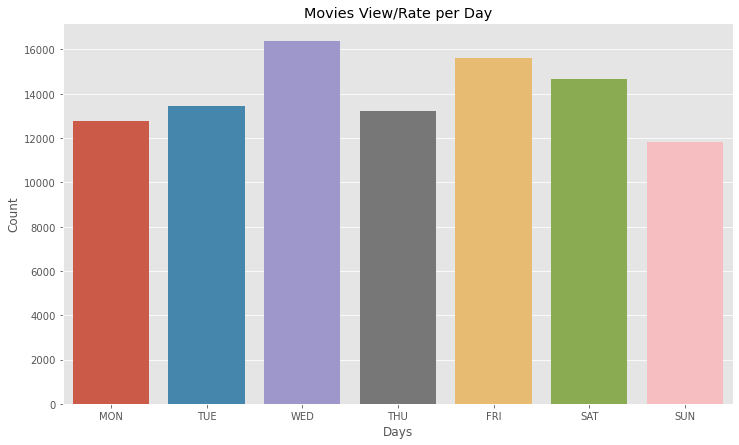

In [243]:
plt.figure(figsize=(12,7))
movies_view_daily = df_ratings.groupby(df_ratings.timestamp.dt.dayofweek).size()
sns.barplot(['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], movies_view_daily.values);
plt.title('Movies View/Rate per Day');
plt.xlabel('Days');
plt.ylabel('Count')

### Even though mid-week seems to slightly stand out (Wednesday), overall the distribution is almost equal and the day of the week does not appear to be a factor on to when users watches/rates movies 

**(2) Who, among men and women, watches/rates more movies?**

<Figure size 648x432 with 0 Axes>

C:\Users\mohamed.ziane\anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_gender'>

Text(0.5, 1.0, 'Male/Female movie rating ratio')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

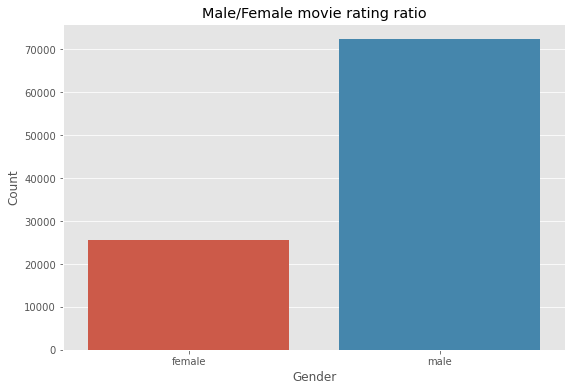

In [245]:
plt.figure(figsize=(9,6))
sns.barplot(df_ratings.groupby('user_gender').size().index, df_ratings.groupby('user_gender').size().values)
plt.title('Male/Female movie rating ratio')
plt.xlabel('Gender')
plt.ylabel('Count')

### Looks like male users are rating more movies than females

**(3) What age group watches more movies?**

<Figure size 648x432 with 0 Axes>

C:\Users\mohamed.ziane\anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bucketized_user_age'>

Text(0.5, 1.0, 'Movie Watchers per Age Group')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Count')

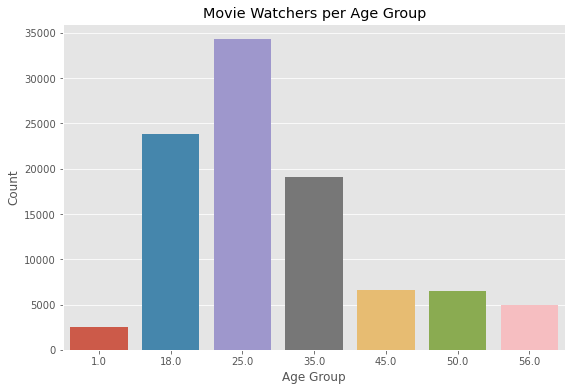

In [246]:
plt.figure(figsize=(9,6))
sns.barplot(df_ratings.groupby('bucketized_user_age').size().index, df_ratings.groupby('bucketized_user_age').size().values)
plt.title('Movie Watchers per Age Group');
plt.xlabel('Age Group');
plt.ylabel('Count')

**Group ranking by age for watching/rating movies**
 * First: 25 (25-34)
 * Second: 18 (18-24)
 * Third: 35 (35-44)

**(4) What kind of occupation do users have that watch/rate movies the most?**

<Figure size 1080x504 with 0 Axes>

C:\Users\mohamed.ziane\anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_occupation_text'>

Text(0.5, 1.0, 'Movie Watchers Occupation Group')

Text(0.5, 0, 'Occupation Group')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'student'),
  Text(1, 0, 'other'),
  Text(2, 0, 'educator'),
  Text(3, 0, 'programmer'),
  Text(4, 0, 'engineer'),
  Text(5, 0, 'administrator'),
  Text(6, 0, 'librarian'),
  Text(7, 0, 'writer'),
  Text(8, 0, 'technician'),
  Text(9, 0, 'executive'),
  Text(10, 0, 'healthcare'),
  Text(11, 0, 'artist'),
  Text(12, 0, 'scientist'),
  Text(13, 0, 'marketing'),
  Text(14, 0, 'entertainment'),
  Text(15, 0, 'retired'),
  Text(16, 0, 'lawyer'),
  Text(17, 0, 'none'),
  Text(18, 0, 'salesman'),
  Text(19, 0, 'doctor'),
  Text(20, 0, 'homemaker')])

Text(0, 0.5, 'Count')

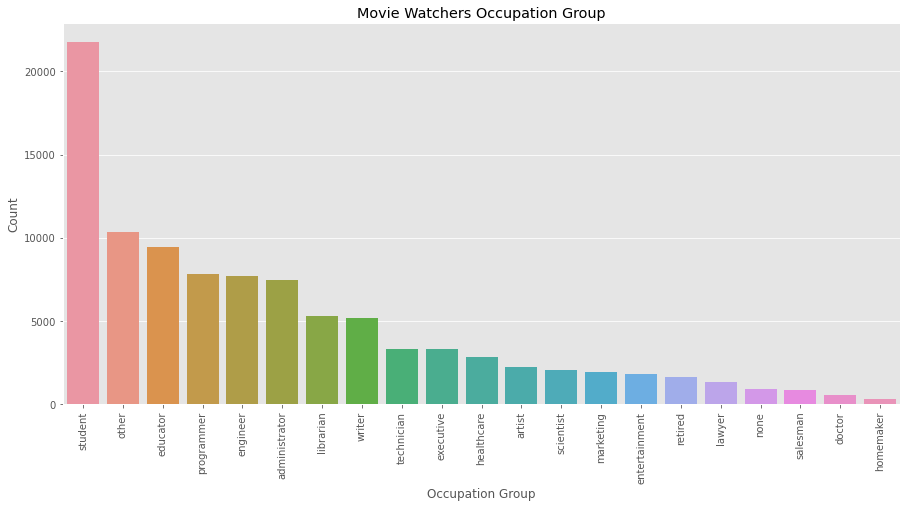

In [247]:
plt.figure(figsize=(15,7))
movie_watcher_occupants = df_ratings.groupby('user_occupation_text').size().sort_values(ascending=False)
sns.barplot(movie_watcher_occupants.index, movie_watcher_occupants.values)
plt.title('Movie Watchers Occupation Group')
plt.xlabel('Occupation Group')
plt.xticks(rotation=90);
plt.ylabel('Count')

In [249]:
more_insights = pd.DataFrame(df_ratings.groupby(['user_occupation_text', 'bucketized_user_age']).size().sort_values(ascending=False)).reset_index()
more_insights[more_insights['user_occupation_text'] == 'student']

,user_occupation_text,bucketized_user_age,0
0,student,18.0,13389
1,student,25.0,5403
9,student,1.0,2228
36,student,35.0,779


**The 18-24 age group for students lead the way**

**(5) Let's have more insights between male and female users**

<Figure size 720x360 with 0 Axes>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Ratings given by Male/Female Viewers')

Text(0.5, 0, 'Ratings')

Text(0, 0.5, 'Count')

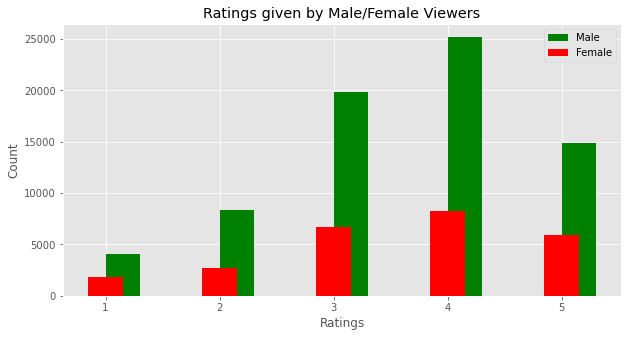

In [252]:
temp_df = df_ratings.groupby(['user_gender', 'user_rating']).size()
plt.figure(figsize=(10, 5))
m_temp_df = temp_df.male.sort_values(ascending=False)
f_temp_df = temp_df.female.sort_values(ascending=False)

plt.bar(x=m_temp_df.index, height=m_temp_df.values, label="Male", align="edge", width=0.3, color='green')
plt.bar(x=f_temp_df.index, height=f_temp_df.values, label="Female", width=0.3, color='red')
plt.title('Ratings given by Male/Female Viewers')
plt.legend()
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

**On a rating scale from 1 to 5, both male and female give more "4" ratings**

**(6) What are the most rated movies? In terms of:**
 * Past years
 * Gender Group
 * Age Group

In [253]:
def draw_horizontal_movie_bar(movie_titles, ratings_count, title=''):
    plt.figure(figsize=(12, 7))
    sns.barplot(y=movie_titles, x=ratings_count, orient='h')
    plt.title(title)
    plt.ylabel('Movies')
    plt.xlabel('Count')
    plt.show()

**Past years**

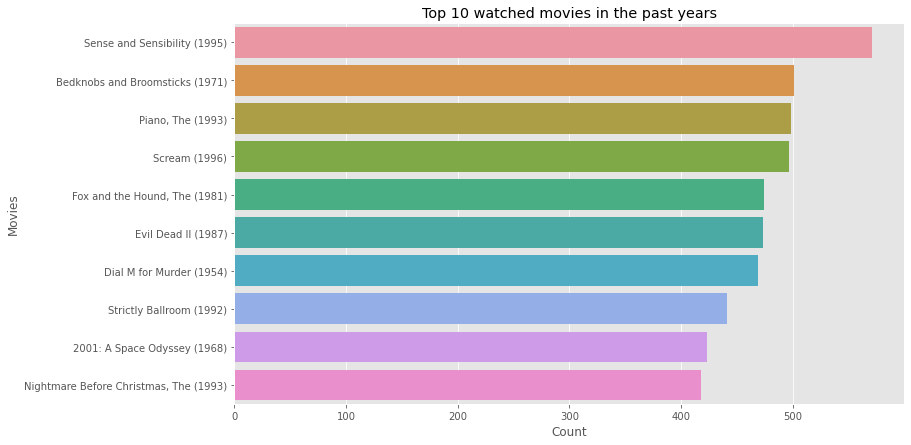

In [254]:
top_ten_rated_movies = df_ratings.groupby('movie_id').size().sort_values(ascending=False)[:10]
top_ten_movie_titles = df_ratings.iloc[top_ten_rated_movies.index].movie_title

draw_horizontal_movie_bar(top_ten_movie_titles.values, top_ten_rated_movies.values, 'Top 10 watched movies in the past years')

**Gender Group**

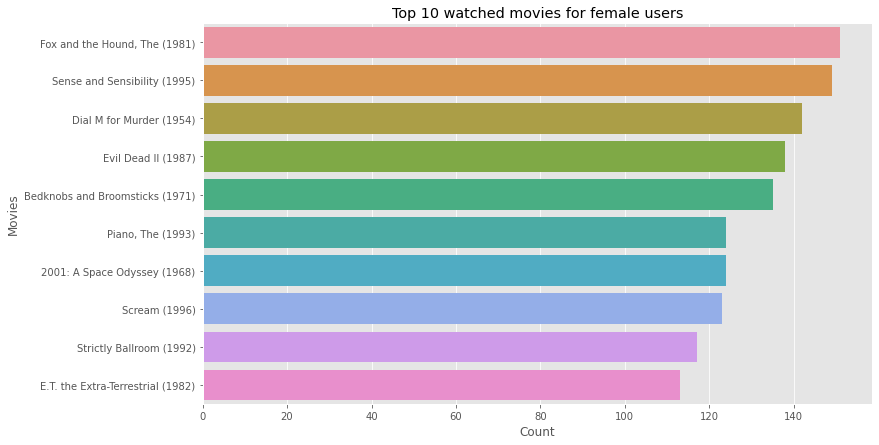

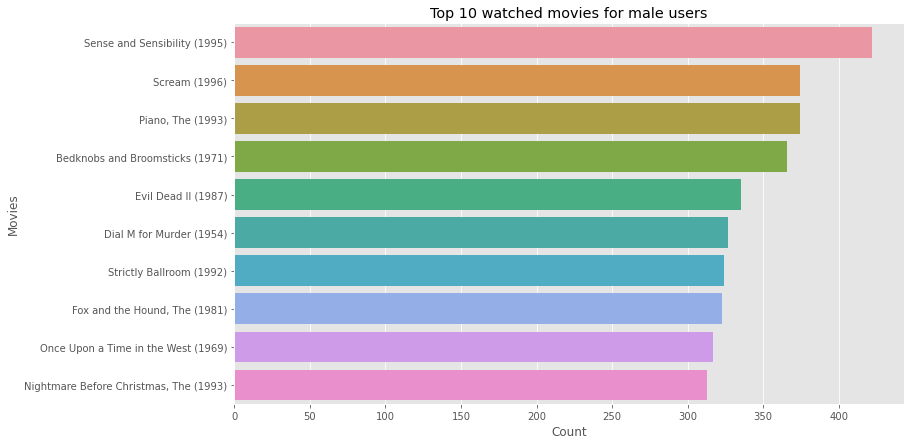

In [257]:
top_rated_movies_gender_wise = df_ratings.groupby(['user_gender','movie_id']).size()

for index_label in top_rated_movies_gender_wise.index.get_level_values(0).unique():

    top_10_userkind_rated_movies = top_rated_movies_gender_wise[index_label].sort_values(ascending=False)[:10]
    top_10_userkind_rated_movie_titles = df_ratings.iloc[top_10_userkind_rated_movies.index].movie_title
    draw_horizontal_movie_bar(top_10_userkind_rated_movie_titles.values, top_10_userkind_rated_movies.values, f'Top 10 watched movies for {index_label} users')

**Age Group**

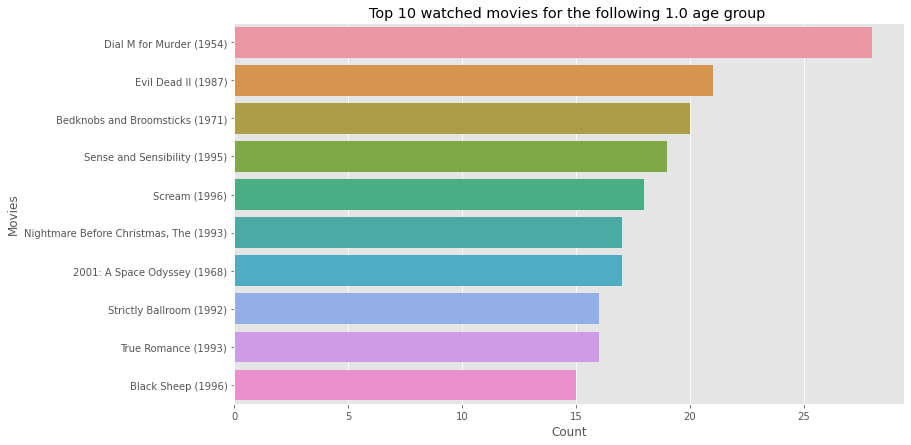

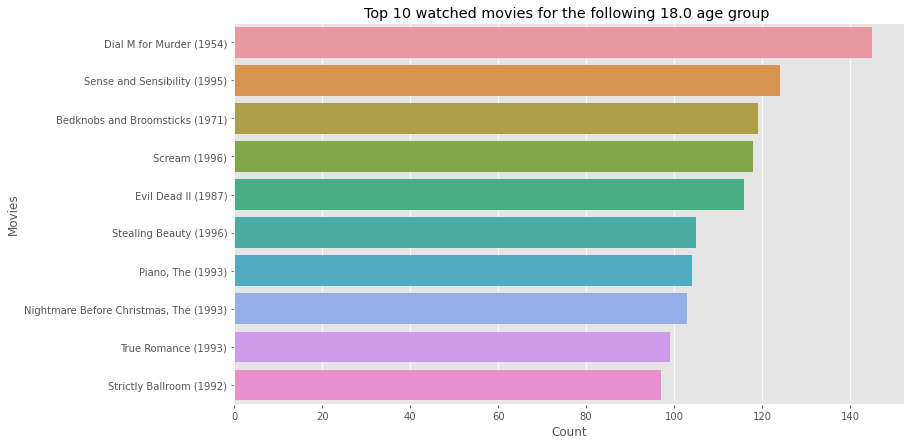

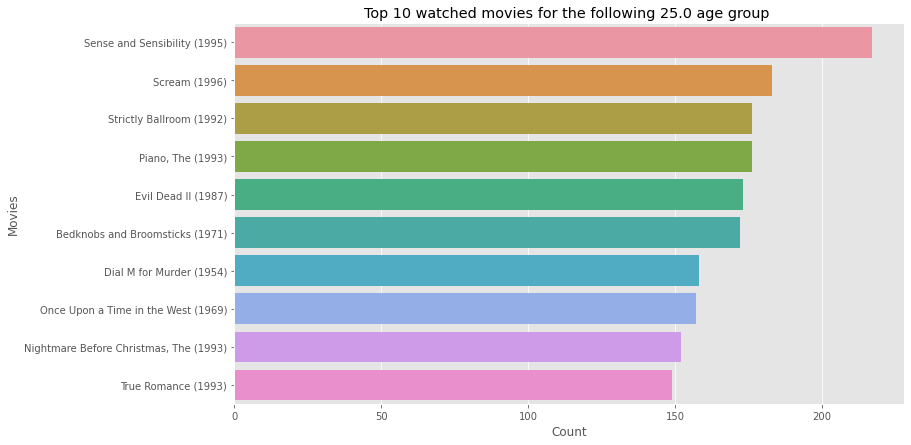

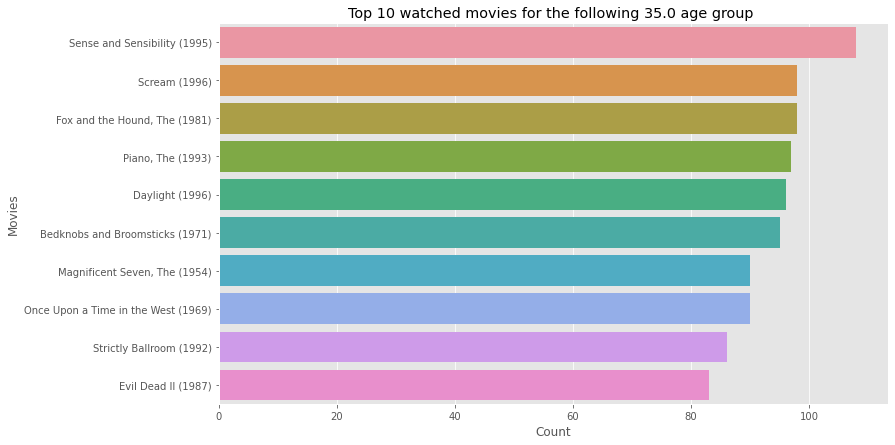

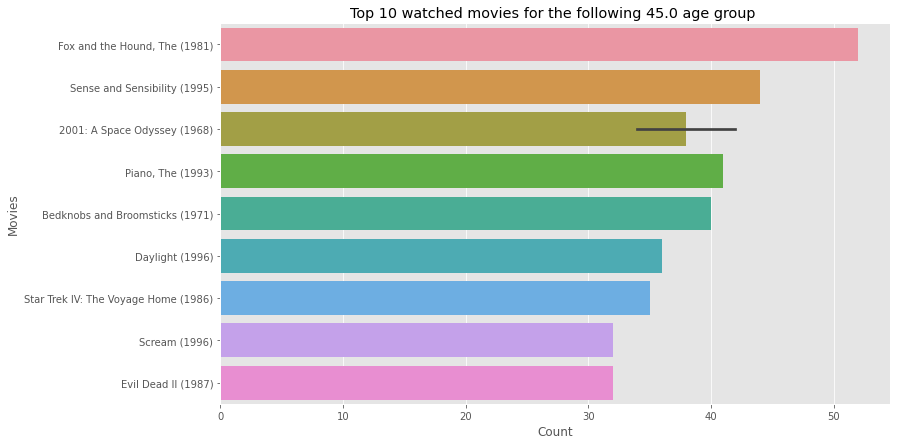

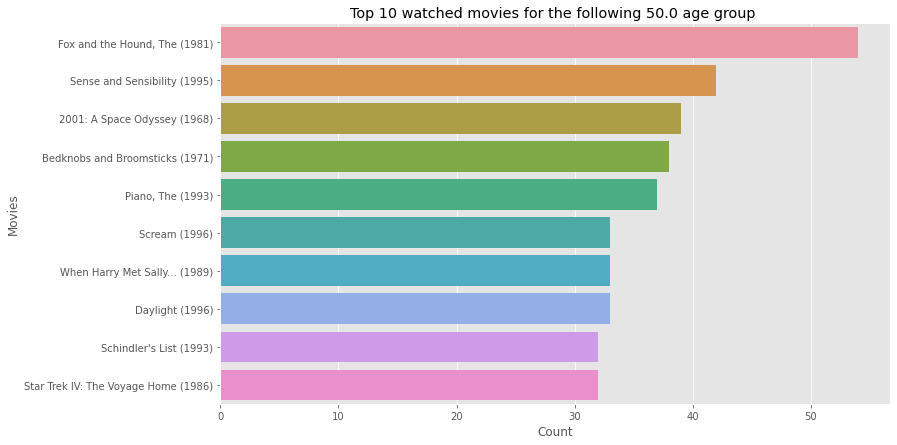

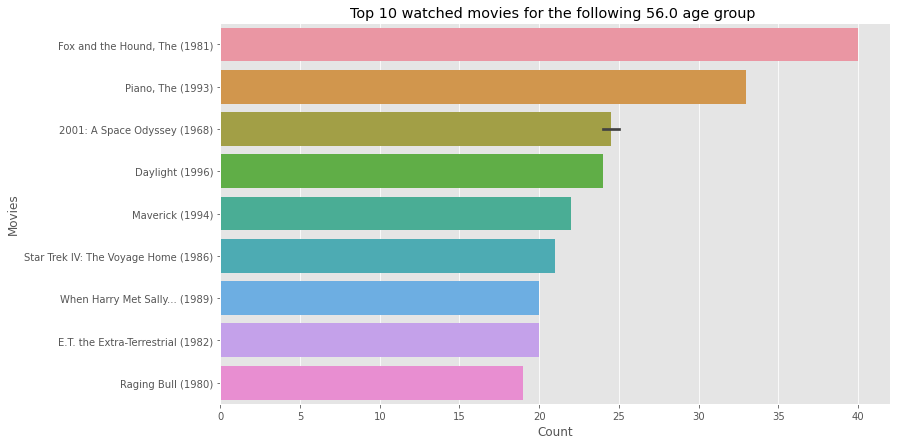

In [259]:
top_rated_movies_age_group_wise = df_ratings.groupby(['bucketized_user_age','movie_id']).size()

for index_label in top_rated_movies_age_group_wise.index.get_level_values(0).unique():
    top_10_userkind_rated_movies = top_rated_movies_age_group_wise[index_label].sort_values(ascending=False)[:10]
    top_10_userkind_rated_movie_titles = df_ratings.iloc[top_10_userkind_rated_movies.index].movie_title
    draw_horizontal_movie_bar(top_10_userkind_rated_movie_titles.values, top_10_userkind_rated_movies.values, f'Top 10 watched movies for the following {index_label} age group ')

**(7) What are the most liked Movies? In terms of:**
 * Past years.    
 * Gender Group.
 * Age Group

**Past years**

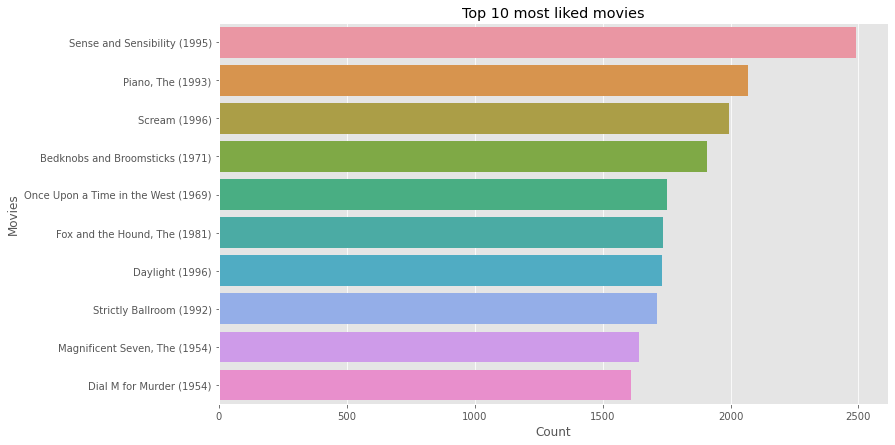

In [261]:
top_ten_most_loved_movies = df_ratings.groupby('movie_id').sum().user_rating.sort_values(ascending=False)[:10]
top_ten_most_loved_movie_titles = df_ratings.iloc[top_ten_most_loved_movies.index].movie_title

draw_horizontal_movie_bar(top_ten_most_loved_movie_titles.values, top_ten_most_loved_movies.values, 'Top 10 most liked movies')

**Gender Group**

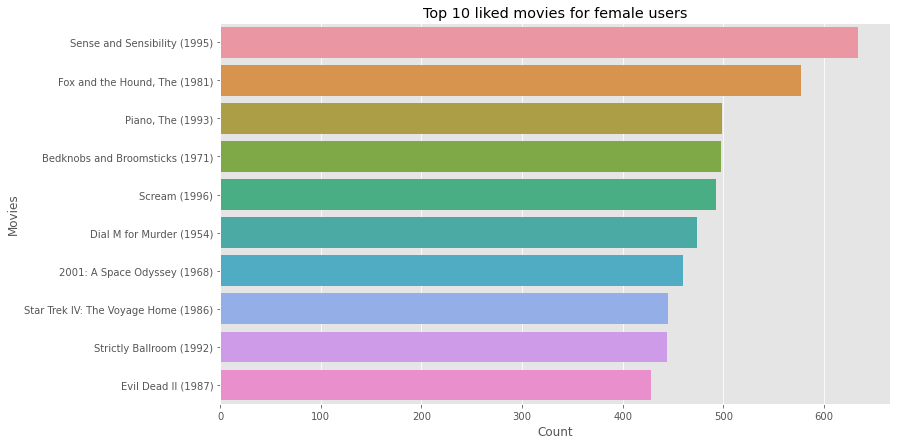

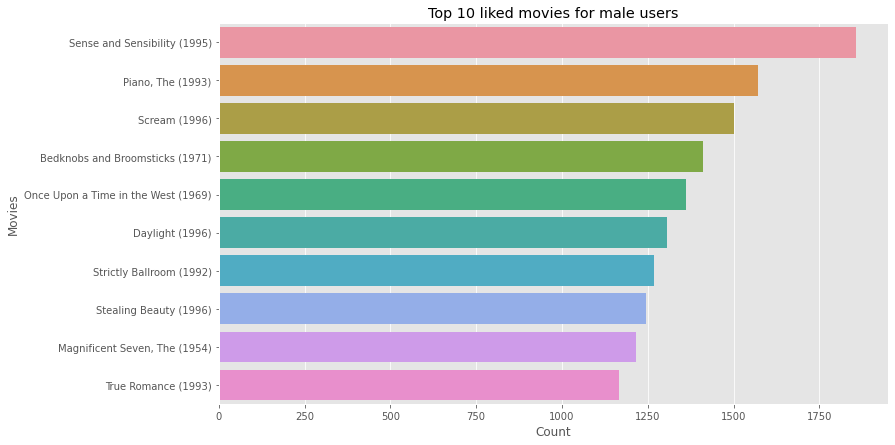

In [262]:
most_loved_movies_gender_wise = df_ratings.groupby(['user_gender','movie_id']).sum().user_rating

for index_label in most_loved_movies_gender_wise.index.get_level_values(0).unique():

    top_10_userkind_loved_movies = most_loved_movies_gender_wise[index_label].sort_values(ascending=False)[:10]
    top_10_userkind_loved_movie_titles = df_ratings.iloc[top_10_userkind_loved_movies.index].movie_title
    draw_horizontal_movie_bar(top_10_userkind_loved_movie_titles.values, top_10_userkind_loved_movies.values, f'Top 10 liked movies for {index_label} users')

**Age Group**

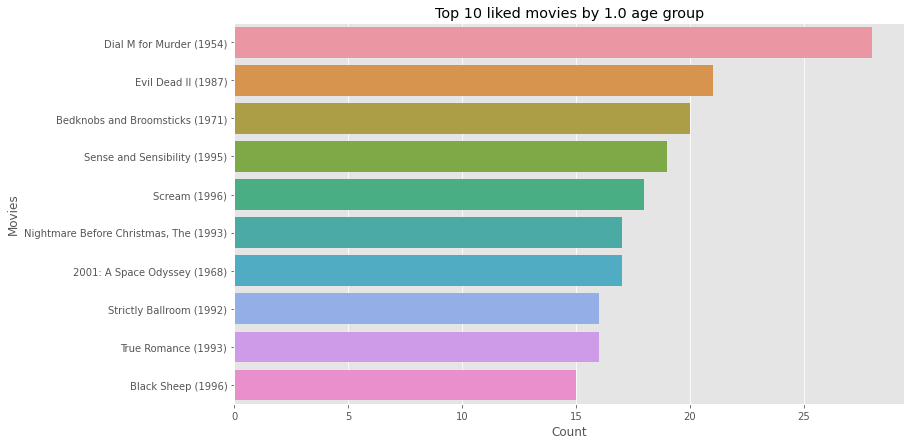

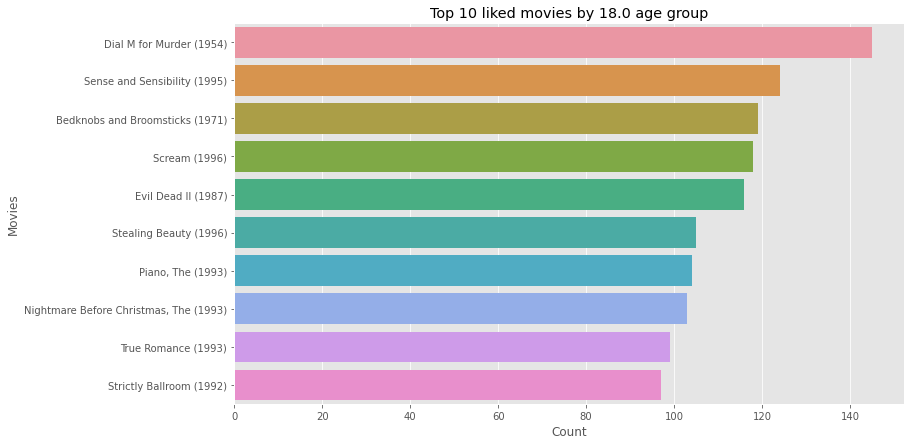

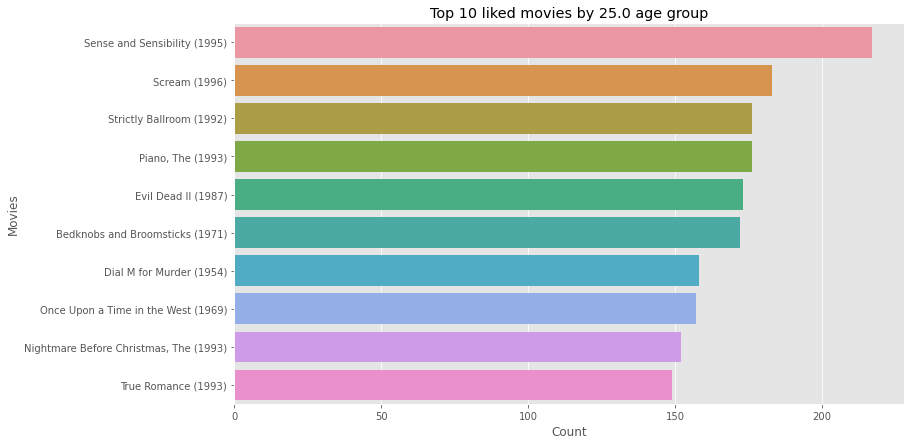

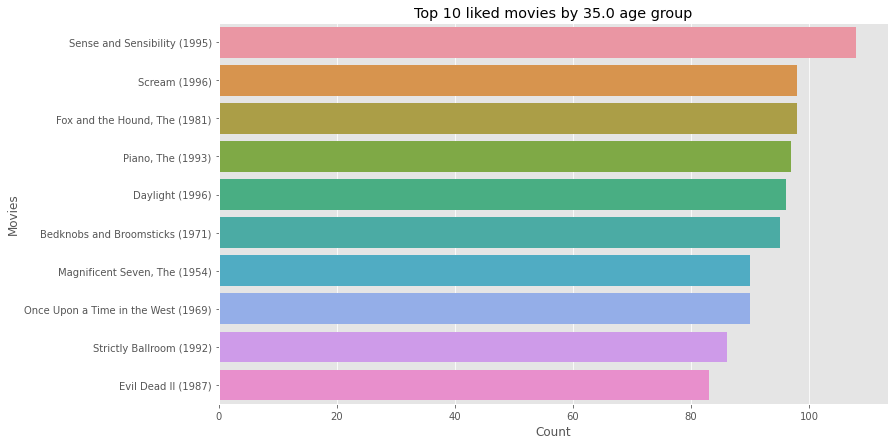

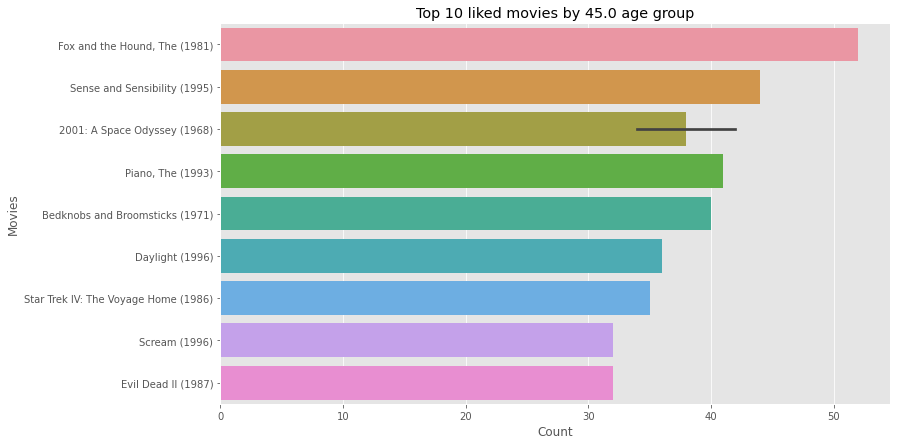

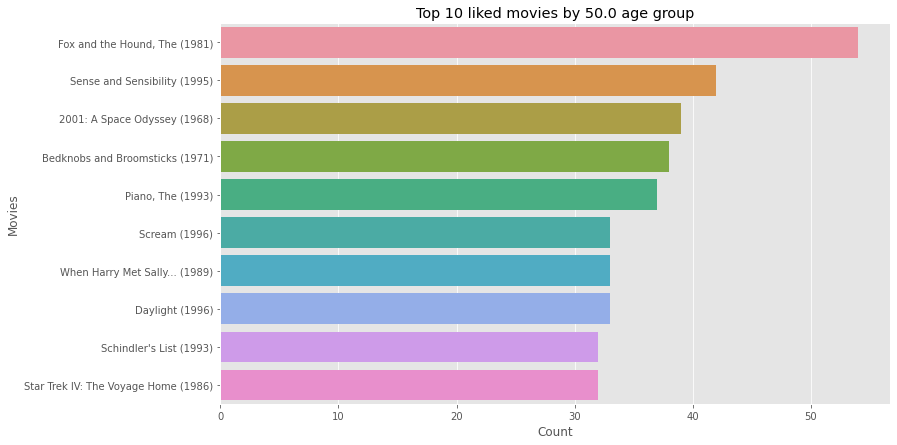

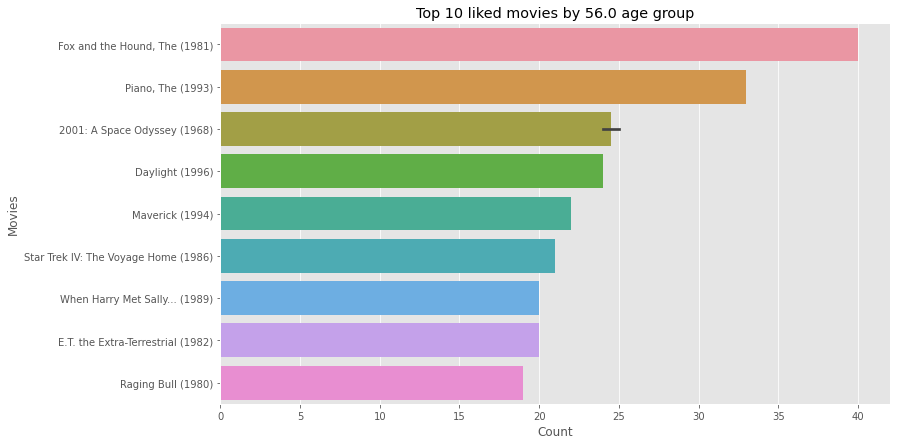

In [263]:
most_loved_movies_age_group_wise = df_ratings.groupby(['bucketized_user_age','movie_id']).sum().user_rating

for index_label in most_loved_movies_age_group_wise.index.get_level_values(0).unique():
    top_10_userkind_loved_movies = top_rated_movies_age_group_wise[index_label].sort_values(ascending=False)[:10]
    top_10_userkind_loved_movie_titles = df_ratings.iloc[top_10_userkind_loved_movies.index].movie_title
    draw_horizontal_movie_bar(top_10_userkind_loved_movie_titles.values, top_10_userkind_loved_movies.values, f'Top 10 liked movies by {index_label} age group')

In [265]:
df_ratings.head()

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code,movie_year_release
0,45.0,[7],357,One Flew Over the Cuckoo's Nest (1975),46.0,1997-11-08 21:25:27,male,138,4,doctor,4.0,53211,1975
1,25.0,[ 4 14],709,Strictly Ballroom (1992),32.0,1997-09-30 21:23:10,male,92,5,entertainment,2.0,80525,1992
2,18.0,[4],412,"Very Brady Sequel, A (1996)",24.0,1997-12-14 04:51:50,male,301,17,student,4.0,55439,1996
3,50.0,[5 7],56,Pulp Fiction (1994),50.0,1997-12-28 16:35:19,male,60,4,healthcare,4.0,6472,1994
4,50.0,[10 16],895,Scream 2 (1997),55.0,1998-04-01 05:39:59,male,197,18,technician,3.0,75094,1997


In [266]:
# Create a dataframe called 'films':
films = df_ratings[['movie_title', 'movie_year_release']]
films.head()

,movie_title,movie_year_release
0,One Flew Over the Cuckoo's Nest (1975),1975
1,Strictly Ballroom (1992),1992
2,"Very Brady Sequel, A (1996)",1996
3,Pulp Fiction (1994),1994
4,Scream 2 (1997),1997


In [267]:
# Let's check how many unique movies we have:
films.movie_title.nunique()

1661

In [269]:
# dropping ALL duplicate values:
films.drop_duplicates(subset ="movie_title",
                       keep = 'first', inplace = True)

In [270]:
films.movie_title.nunique()

1661

In [271]:
# Let's confirm how many movies:
films.movie_title.value_counts()

'Til There Was You (1997)       1
Only You (1994)                 1
Outlaw, The (1943)              1
Outbreak (1995)                 1
Out to Sea (1997)               1
                               ..
Forrest Gump (1994)             1
Forget Paris (1995)             1
Foreign Student (1994)          1
Foreign Correspondent (1940)    1
unknown                         1
Name: movie_title, Length: 1661, dtype: int64

C:\Users\MOHAME~1.ZIA\AppData\Local\Temp/ipykernel_13524/1662193000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films['movie_year_release'] = pd.to_datetime(films['movie_year_release'], errors='coerce')
C:\Users\mohamed.ziane\anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


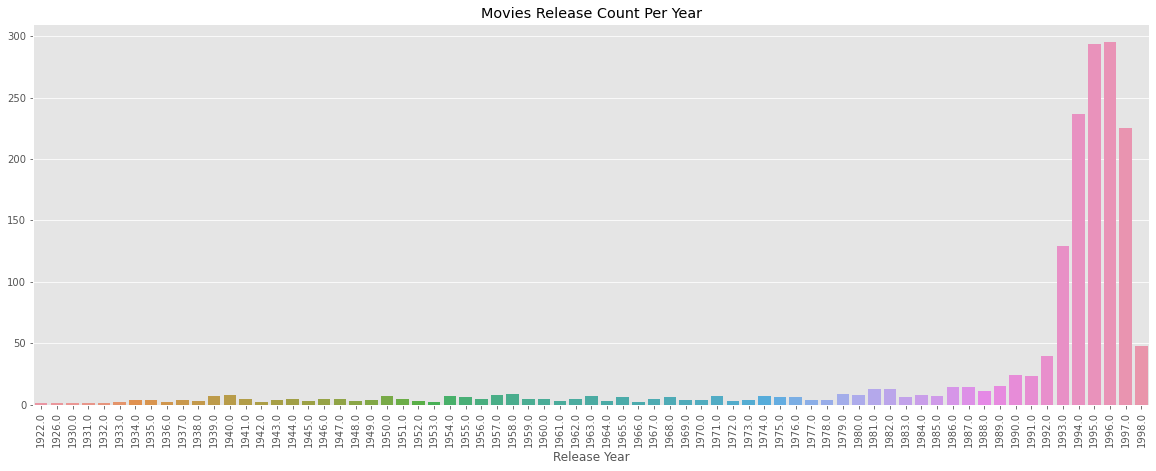

In [278]:
plt.figure(figsize=(20,7))
films['movie_year_release'] = pd.to_datetime(films['movie_year_release'], errors='coerce')
yearly_release_counts = films.groupby(films.movie_year_release.dt.year).size().sort_values(ascending=False)
sns.barplot(yearly_release_counts.index, yearly_release_counts.values);
plt.xlabel('Release Year')
plt.xticks(rotation=90);
plt.title('Movies Release Count Per Year');

**90's movies seem to lead the way**

**(8) What are the worst movies per rating?**

We'll be using the ***wordcloud package***. 
Documentations and more details can be found [here](http://amueller.github.io/word_cloud/).

Below is the code used to produce the worst movies in terms of ratings:

<Figure size 1152x720 with 0 Axes>

(-0.5, 1199.5, 799.5, -0.5)

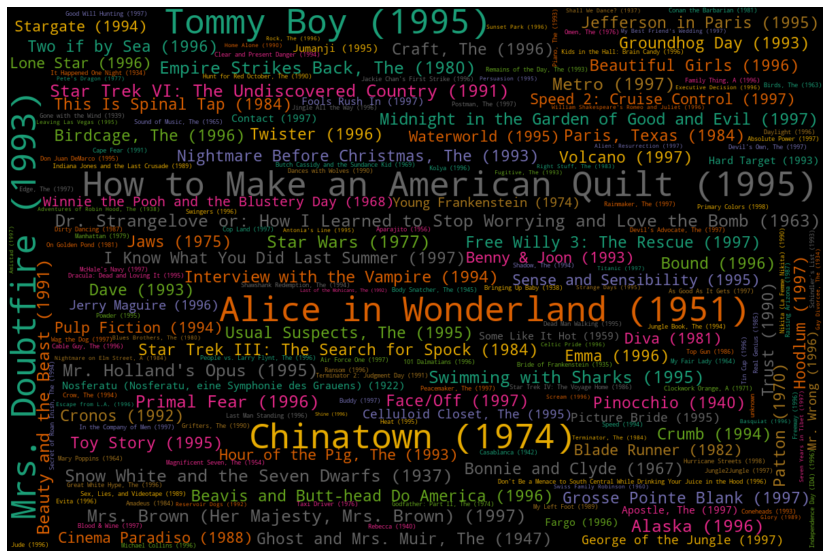

In [279]:
movies_ratings_sum = df_ratings.groupby('movie_id').sum().user_rating.sort_values()
movies_ratings_sum.index = df_ratings.iloc[movies_ratings_sum.index].movie_title
# Will show movies with 0 < total_rating<= 10
lowest_rated_movies = movies_ratings_sum[movies_ratings_sum <= 10]


wordcloud = WordCloud(min_font_size=7, width=1200, height=800, random_state=21, max_font_size=50, relative_scaling=0.2, colormap='Dark2')
# Substracted lowest_rated_movies from 11 so that we can have greater font size of least rated movies.
wordcloud.generate_from_frequencies(frequencies=(11-lowest_rated_movies).to_dict())
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**(9) Is there any relation between the users rate and their geographical location?**

To answer this questions:

 * We'll be using the **folium Library**, due to it's impressive capability of interactive visualization. More details about folium and how to install, please check [here](https://pypi.org/project/folium/).
 * Let's create Two Dataframes --> **One:** Average user rating per Zip Code and **Two:** Takes user occupants per Zipcodes.
 * For folium to work without error, zipcode needs to be in a string format. 
 * Trying to limit the number of zipcodes to avoid any memory errors, in our case we'll be taking only CA Zipcodes which are available in the Movie lens 1M Dataset.
 * Also, we'll be using external databases:
  - To get the coordinate of the zipcodes --> This is needed for to highlight the zipcodes as labels in the map.
  - To get a geoJSON file which has coordinates of zipcode --> This is needed to map the zipcodes boundaries.

In [282]:
df_ratings.head()
df_ratings.user_zip_code.value_counts()
df_ratings.columns

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code,movie_year_release
0,45.0,[7],357,One Flew Over the Cuckoo's Nest (1975),46.0,1997-11-08 21:25:27,male,138,4,doctor,4.0,53211,1975
1,25.0,[ 4 14],709,Strictly Ballroom (1992),32.0,1997-09-30 21:23:10,male,92,5,entertainment,2.0,80525,1992
2,18.0,[4],412,"Very Brady Sequel, A (1996)",24.0,1997-12-14 04:51:50,male,301,17,student,4.0,55439,1996
3,50.0,[5 7],56,Pulp Fiction (1994),50.0,1997-12-28 16:35:19,male,60,4,healthcare,4.0,6472,1994
4,50.0,[10 16],895,Scream 2 (1997),55.0,1998-04-01 05:39:59,male,197,18,technician,3.0,75094,1997


55414    1103
20009     878
10019     850
22902     832
61820     817
         ... 
1701       20
93117      20
76234      20
38866      20
60302      20
Name: user_zip_code, Length: 778, dtype: int64

Index(['bucketized_user_age', 'movie_genres', 'movie_id', 'movie_title',
       'raw_user_age', 'timestamp', 'user_gender', 'user_id',
       'user_occupation_label', 'user_occupation_text', 'user_rating',
       'user_zip_code', 'movie_year_release'],
      dtype='object')

In [283]:
zipcode_m = df_ratings[[ 'user_rating', 'user_zip_code']]
zipcode_m.head()

,user_rating,user_zip_code
0,4.0,53211
1,2.0,80525
2,4.0,55439
3,4.0,6472
4,3.0,75094


In [285]:
avg_rate_zip = zipcode_m.groupby('user_zip_code')['user_rating'].mean().reset_index()
avg_rate_zip.head()

,user_zip_code,user_rating
0,0,3.7
1,1002,4.3
2,1040,3.8
3,1080,3.7
4,1331,3.3


In [286]:
avg_rate_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_zip_code  778 non-null    int64  
 1   user_rating    778 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 12.3 KB


In [287]:
avg_rate_zip['user_zip_code'] = avg_rate_zip['user_zip_code'].astype('int64')

In [288]:
us_zip =  pd.read_csv('zip-code-usa.csv')

In [290]:
us_zip.head()
us_zip.info()

,user_zip_code,City,County,Latitude,Longitude,State
0,601,Adjuntas,Adjuntas,18.2,-66.8,Puerto Rico
1,602,Aguada,Aguada,18.4,-67.2,Puerto Rico
2,603,Aguadilla,Aguadilla,18.5,-67.1,Puerto Rico
3,606,Maricao,Maricao,18.2,-66.9,Puerto Rico
4,610,Anasco,Añasco,18.3,-67.1,Puerto Rico


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_zip_code  33120 non-null  int64  
 1   City           33120 non-null  object 
 2   County         33120 non-null  object 
 3   Latitude       33120 non-null  float64
 4   Longitude      33120 non-null  float64
 5   State          33120 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ MB


In [291]:
us_rate_zip = pd.merge(avg_rate_zip, us_zip, on='user_zip_code', how='inner')

In [293]:
us_rate_zip.head()
us_rate_zip.shape

,user_zip_code,user_rating,City,County,Latitude,Longitude,State
0,1002,4.3,Amherst,Hampshire,42.4,-72.5,Massachusetts
1,1040,3.8,Holyoke,Hampden,42.2,-72.6,Massachusetts
2,1080,3.7,Three Rivers,Hampden,42.2,-72.4,Massachusetts
3,1331,3.3,Athol,Worcester,42.6,-72.2,Massachusetts
4,1375,4.1,Sunderland,Franklin,42.5,-72.6,Massachusetts


(734, 7)

<Figure size 1440x504 with 0 Axes>

C:\Users\mohamed.ziane\anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State'>

Text(0.5, 0, 'US State')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'California'),
  Text(1, 0, 'Texas'),
  Text(2, 0, 'New York'),
  Text(3, 0, 'Minnesota'),
  Text(4, 0, 'Illinois'),
  Text(5, 0, 'Pennsylvania'),
  Text(6, 0, 'Massachusetts'),
  Text(7, 0, 'Ohio'),
  Text(8, 0, 'Maryland'),
  Text(9, 0, 'Washington'),
  Text(10, 0, 'Virginia'),
  Text(11, 0, 'Florida'),
  Text(12, 0, 'Georgia'),
  Text(13, 0, 'New Jersey'),
  Text(14, 0, 'Wisconsin'),
  Text(15, 0, 'Oregon'),
  Text(16, 0, 'Michigan'),
  Text(17, 0, 'Connecticut'),
  Text(18, 0, 'Colorado'),
  Text(19, 0, 'Missouri'),
  Text(20, 0, 'North Carolina'),
  Text(21, 0, 'Iowa'),
  Text(22, 0, 'Arizona'),
  Text(23, 0, 'South Carolina'),
  Text(24, 0, 'Kentucky'),
  Text(25, 0, 'Tennessee'),
  Text(26, 0, 'Oklahoma'),
  Text(27, 0, 'Utah'),
  Text(28, 

Text(0.5, 1.0, 'States that contain the most active users')

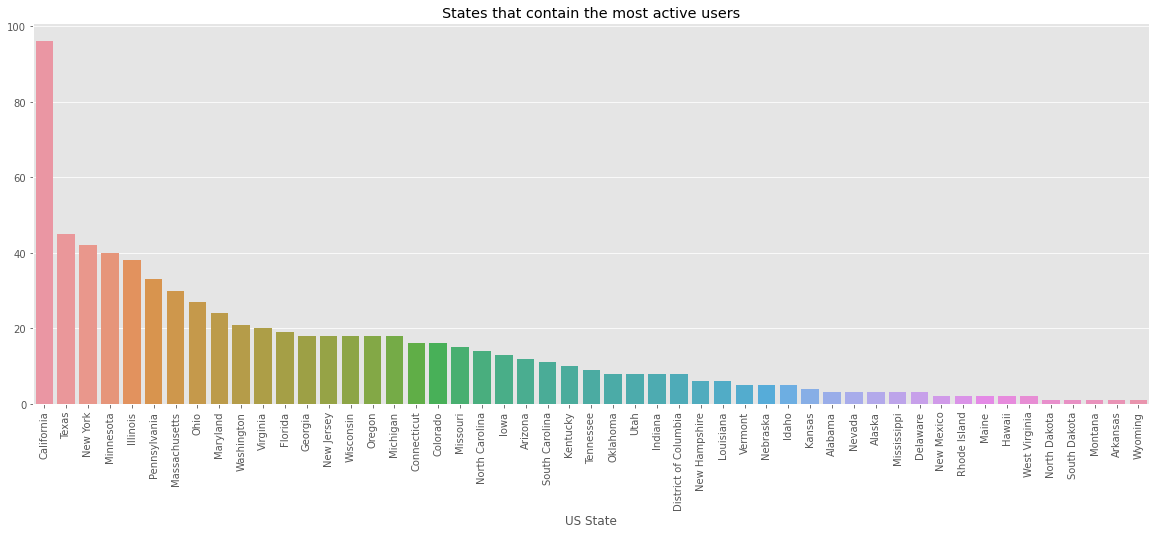

In [340]:
plt.figure(figsize=(20,7))
geo_counts = us_rate_zip.groupby('State')['user_zip_code'].nunique().sort_values(ascending=False)
sns.barplot(geo_counts.index, geo_counts.values);
plt.xlabel('US State')
plt.xticks(rotation=90);
plt.title('States that contain the most active users')

**California and Texas lead the way.**
**Are the students the group who's also causing such high rates?** 

In [352]:
df_ratings.columns
occupant_zip = df_ratings[['user_zip_code', 'user_occupation_text']]
occupant_zip.head()
counting = occupant_zip.groupby(['user_zip_code', 'user_occupation_text'])[ 'user_occupation_text'].count()
count_df = pd.DataFrame(counting)
count_df.head()

Index(['bucketized_user_age', 'movie_genres', 'movie_id', 'movie_title',
       'raw_user_age', 'timestamp', 'user_gender', 'user_id',
       'user_occupation_label', 'user_occupation_text', 'user_rating',
       'user_zip_code', 'movie_year_release'],
      dtype='object')

,user_zip_code,user_occupation_text
0,53211,doctor
1,80525,entertainment
2,55439,student
3,6472,healthcare
4,75094,technician


user_occupation_text
user_zip_code user_occupation_text                      
0             engineer                                37
              executive                               92
1002          student                                 22
1040          entertainment                           22
1080          librarian                               21

In [353]:
count_df.rename(columns = {list(count_df)[0]: 'Occupants_count'}, inplace = True)
count_df
count_df.reset_index(inplace=True)
count_df.info()

Occupants_count
user_zip_code user_occupation_text                 
0             engineer                           37
              executive                          92
1002          student                            22
1040          entertainment                      22
1080          librarian                          21
...                                             ...
99603         librarian                          74
99687         artist                            148
99709         scientist                          93
              writer                             73
99835         other                              49

[890 rows x 1 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user_zip_code         890 non-null    int64 
 1   user_occupation_text  890 non-null    object
 2   Occupants_count       890 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 21.0+ KB


In [354]:
# Alright, now let's check the high rating in California
count_df[count_df['user_zip_code'] == 94708]

,user_zip_code,user_occupation_text,Occupants_count
816,94708,student,35


**Indeed, students are the group driving the rating in California**

**(10) Whats the most popular Genre in our dataset?**

In [358]:
df_ratings.head()

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code,movie_year_release
0,45.0,[7],357,One Flew Over the Cuckoo's Nest (1975),46.0,1997-11-08 21:25:27,male,138,4,doctor,4.0,53211,1975
1,25.0,[ 4 14],709,Strictly Ballroom (1992),32.0,1997-09-30 21:23:10,male,92,5,entertainment,2.0,80525,1992
2,18.0,[4],412,"Very Brady Sequel, A (1996)",24.0,1997-12-14 04:51:50,male,301,17,student,4.0,55439,1996
3,50.0,[5 7],56,Pulp Fiction (1994),50.0,1997-12-28 16:35:19,male,60,4,healthcare,4.0,6472,1994
4,50.0,[10 16],895,Scream 2 (1997),55.0,1998-04-01 05:39:59,male,197,18,technician,3.0,75094,1997


In [363]:
# Alright in order to deal with movie_genres columns which is a list of strings, 
# let's create below function so we can apply typical pandas functions:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [413]:
test = (to_1D(df_ratings["movie_genres"]).value_counts().index)[3:]
test

Index(['1', '4', '7', '0', '6', '5', '3', '8', '2', '9'], dtype='object')

In [414]:
test2 = (to_1D(df_ratings["movie_genres"]).value_counts().values)[3:]
test2

array([92640, 48332, 39041, 30239, 22111, 20335, 12228, 10543,  8436,
        3515], dtype=int64)

C:\Users\mohamed.ziane\anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Genres')

Text(0.5, 1.0, "Movie's Genres")

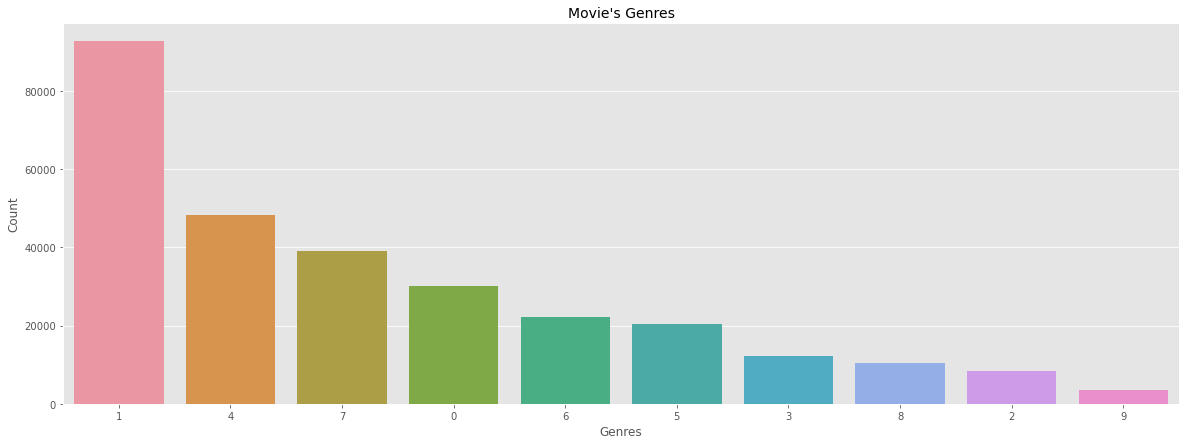

In [416]:
fig, ax = plt.subplots(figsize = (20,7))
index_value = (to_1D(df_ratings["movie_genres"]).value_counts().index)[3:]
index_count = (to_1D(df_ratings["movie_genres"]).value_counts().values)[3:]
sns.barplot(index_value, 
       index_count)
ax.set_ylabel("Count", size = 12)
ax.set_xlabel("Genres", size = 12)
ax.set_title("Movie's Genres", size = 14)

We can infer from the above graph that the 3 top most popular Genres are Adventure, Comedy and Drama:
 
 * The Genres of the movies are classified into 21 different classes as below:
   * 0: Action
   * 1: Adventure
   * 2: Animation
   * 3: Children
   * 4: Comedy
   * 5: Crime
   * 6: Documentary
   * 7: Drama
   * 8: Fantasy
   * 9: Film-Noir
   * 10: Horror
   * 11: IMAX
   * 12: Musical
   * 13: Mystery
   * 14: Romance
   * 15: Sci-Fi
   * 16: Thriller
   * 17: Unknown
   * 18: War
   * 19: Western
   * 20: no genres listed

In [417]:
#Let's now save the cleaned dataframe:df_ratings 
# Saving df_final_v1:
df_ratings.to_csv(path_or_buf = "C:\\Users\\mohamed.ziane\\tensorflow_datasets\\Notebooks" + "//100k_movielens_metadata_ratings.csv", index=False)
df_movies.to_csv(path_or_buf = "C:\\Users\\mohamed.ziane\\tensorflow_datasets\\Notebooks"  + "//100k_movielens_metadata_moviess.csv", index=False)